In [1]:
import matplotlib.pyplot as pl
import matplotlib as mpl
%matplotlib inline

import astropy.units as u
import astropy.io.fits as fits
from astropy.utils.data import download_file
from astropy.nddata import StdDevUncertainty

from specutils.spectra.spectrum1d import Spectrum1D



## Read spectrum data

This step is outside the scope of the backend. The UI is assumed to feed the spectrum data to the backed via a properly intialized Spectrum1D instance.

In [2]:
# fn = download_file('https://data.sdss.org/sas/dr14/manga/spectro/redux/v2_1_2/7495/stack/manga-7495-12704-LOGCUBE.fits.gz', cache=True)
fn = download_file('file:/Users/busko/Downloads/manga-7495-12704-LOGCUBE.fits', cache=True)
f = fits.open(fn)

flux = f[1].data
err = f[2].data
wave = f[4].data

In [3]:
# Units handling is presumed to come from above, perhaps at the loader level?
# Here we pretend we got them already somehow
flux_units = u.def_unit('flux_units', 1.E-17 * u.erg/u.s/u.cm/u.cm/u.Angstrom)
u.add_enabled_units([flux_units])
wave_units = u.Unit('Angstrom')

flux = flux[:,35,35] * flux_units
err = err[:,35,35] * flux_units
wave = wave * wave_units

# Finally, this is the object the backed expects via its API.
spectrum = Spectrum1D(spectral_axis=wave, flux=flux, uncertainty=StdDevUncertainty(err))

### Visual check

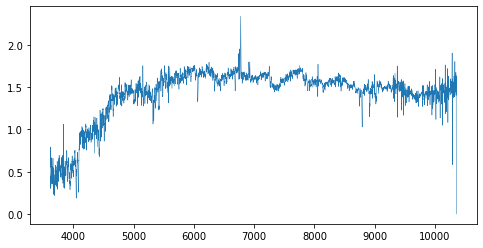

In [4]:
pl.figure()
pl.gcf().set_size_inches((8.,4.))
pl.plot(spectrum.spectral_axis, spectrum.flux, linewidth=0.5, label='obs')

## Read model data

The UI is assumed to feed an instance of an astropy compound model to the backed API.  